In [1]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

C:\Users\tymydu\AppData\Local\Temp\ipykernel_8892\1955000367.py:4: RuntimeWarning: divide by zero encountered in ulong_scalars
  return 10 * np.log10(np.sum(X**2) / np.sum((X - X_noisy)**2))


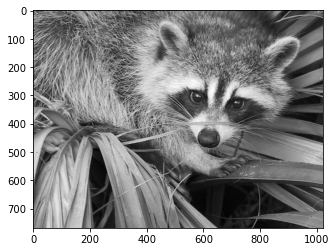

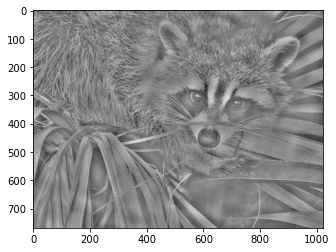

In [51]:
prag_snr = 0.1

def snr(X, X_noisy):
    return 10 * np.log10(np.sum(X**2) / np.sum((X - X_noisy)**2))

def atenuare(X, freq_cutoff):
    Y = np.fft.fft2(X)
    freq_db = 20*np.log10(abs(Y))
    Y[freq_db > freq_cutoff] = 0
    X_cutoff = np.fft.ifft2(Y)
    X_cutoff = np.real(X_cutoff)
    return X_cutoff

X = misc.face(gray=True)
X_copie = X.copy()

for step in range(200):
    snr_copie = snr(X,X_copie)
    if snr_copie <= prag_snr:
        break
    X_copie = atenuare(X_copie, 120)

plt.imshow(X, cmap=plt.cm.gray)
plt.show()
plt.imshow(X_copie, cmap=plt.cm.gray)
plt.show()

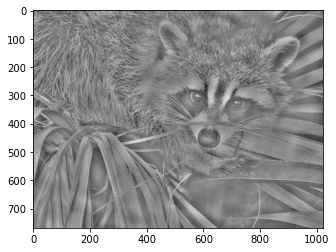

In [4]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()